In [1]:
from __future__ import print_function

import numpy as np
import random

from matplotlib import pyplot as plt

from selectinf.nbd_lasso import nbd_lasso
from selectinf.Utils.discrete_family import discrete_family
from instance import GGM_instance

from nbd_naive_and_ds import *

/Users/yilingh/Desktop/PhD/SI_Codes/SI-Graphs/env3/lib/python3.10/site-packages/regreg/atoms/slope.py:16: UserWarning: unable to import isotonic regression from sklearn, using a pure python implementation
  warn('unable to import isotonic regression from sklearn, using a pure python implementation')


In [2]:
# TODO: Add root n to the randomization covariance
# Remark: Not needed (?) anymore since X is now scaled
prec,cov,X = GGM_instance(n=1000,p=10, max_edges=2)
nbd_instance = nbd_lasso.gaussian(X, n_scaled=False)
active_signs_nonrandom = nbd_instance.fit(perturb=np.zeros((10,9)))
active_signs_random = nbd_instance.fit()
print(active_signs_nonrandom.shape)
print(np.abs(active_signs_nonrandom).sum())
print(np.abs(active_signs_random).sum())
print(np.abs(prec != 0).sum() - 10)

Custom perturbation
Sampled perturbation
(10, 9)
8.0
8.0
12


In [3]:
prec_no_diag = remove_diag(prec)
print(np.abs(active_signs_nonrandom).sum())
print(np.abs(active_signs_random).sum())
print(np.abs(active_signs_nonrandom - np.sign(-prec_no_diag)).sum())
print(np.abs(active_signs_random - np.sign(-prec_no_diag)).sum())

8.0
8.0
4.0
4.0


In [4]:
n = 1000
nonzero = get_nonzero(active_signs_nonrandom)

In [5]:
nonzero_true = prec != 0

In [6]:
for i in range(nonzero_true.shape[0]):
    nonzero_true[i,i] = False
nonzero_true

array([[False, False, False, False,  True,  True, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [ True, False, False, False, False, False, False, False, False,
        False],
       [False, False,  True, False, False, False, False, False,  True,
        False],
       [False, False,  True,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [1]:
intervals,condlDists = \
    conditional_inference(X/np.sqrt(n), nonzero=nonzero_true)

coverage = get_coverage(nonzero, intervals, prec*n, X.shape[0], X.shape[1])

NameError: name 'conditional_inference' is not defined

( 0 , 4 ) selected
Theta ( 0 , 4 ) interval: [nan nan]
Theta ( 0 , 4 ) -0.34796207246795596
S/n ( 0 , 4 ) 0.4884033390024892


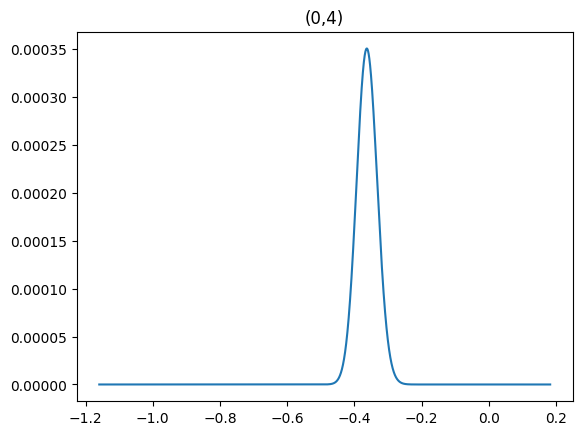

( 0 , 5 ) selected
Theta ( 0 , 5 ) interval: [nan nan]
Theta ( 0 , 5 ) -0.3485252833802436
S/n ( 0 , 5 ) 0.5061104282630131


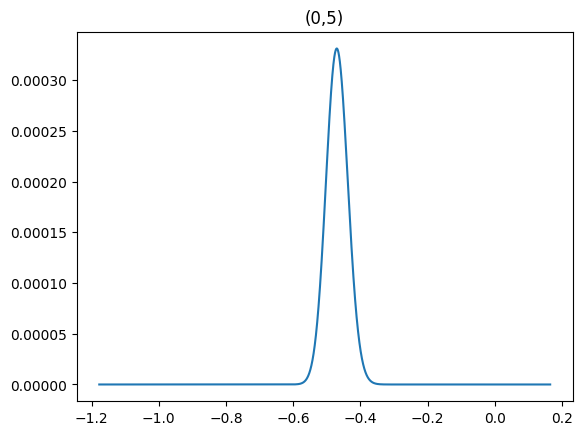

( 2 , 6 ) selected
Theta ( 2 , 6 ) interval: [nan nan]
Theta ( 2 , 6 ) 0.28697925137200037
S/n ( 2 , 6 ) -0.39349105102652365


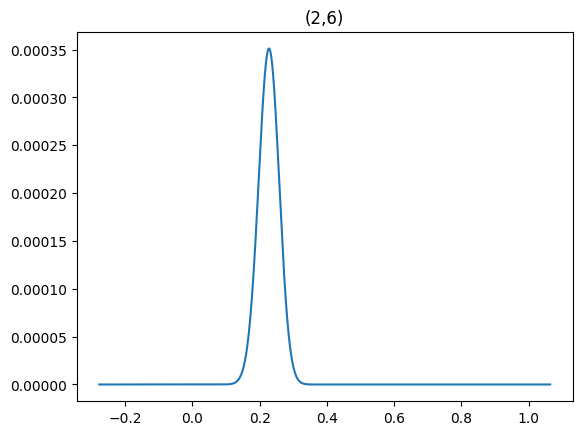

( 2 , 7 ) selected
Theta ( 2 , 7 ) interval: [0.19233756 0.19673214]
Theta ( 2 , 7 ) 0.17668653408621865
S/n ( 2 , 7 ) -0.18279002267464767


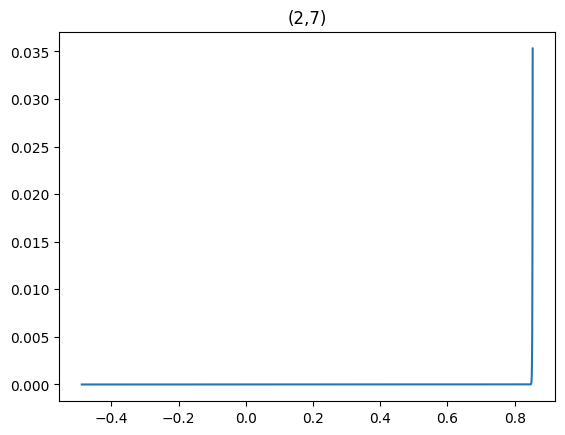

( 3 , 7 ) selected
Theta ( 3 , 7 ) interval: [-0.11000749 -0.07750899]
Theta ( 3 , 7 ) 0.031456832494903775
S/n ( 3 , 7 ) -0.007895185563243111


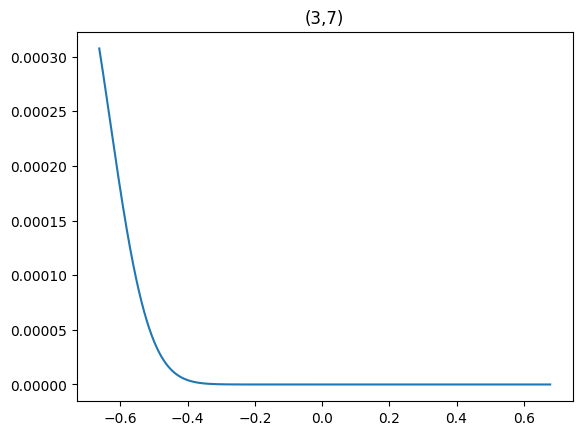

( 6 , 8 ) selected
Theta ( 6 , 8 ) interval: [nan nan]
Theta ( 6 , 8 ) 0.44861385611091337
S/n ( 6 , 8 ) -0.5998714844848866


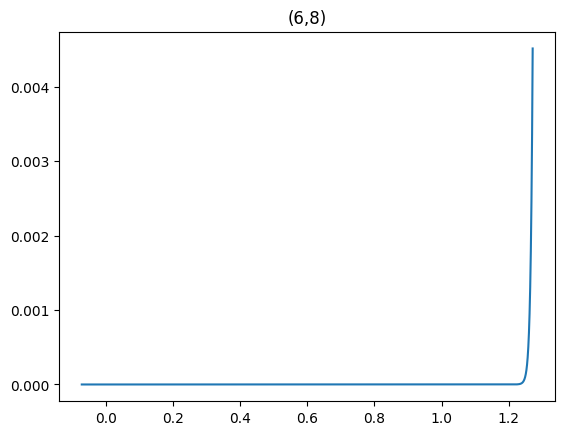

In [8]:
print_nonzero_intervals(nonzero_true, intervals, prec, X, condlDists)

In [9]:
nonzero, intervals, cov_rate, avg_len = naive_inference(X, prec,
                                                        true_nonzero=nonzero_true)

lb: -1.7974524740534508
ub: 1.9108817215946592
fa: 1.0000000000000002
fb: 1.0
y: 0.95
fa_: 1.0000000000000002
fb_: nan
y_: 0.95
fa: 1.0000000000000002
fb: 1.0
y: 0.05
fa_: 1.0000000000000002
fb_: nan
y_: 0.05
Failed to construct intervals: nan
lb: -2.0052515193020173
ub: 2.044971682790115
fa: 1.0
fb: 1.0
y: 0.95
fa_: 1.0
fb_: nan
y_: 0.95
fa: 1.0
fb: 1.0
y: 0.05
fa_: 1.0
fb_: nan
y_: 0.05
Failed to construct intervals: nan
lb: -1.8185823555613625
ub: 1.6422508320862328
fa: 0.0
fb: 0.0
y: 0.95
fa_: nan
fb_: 0.0
y_: 0.95
fa: 0.0
fb: 0.0
y: 0.05
fa_: nan
fb_: 0.0
y_: 0.05
Failed to construct intervals: nan
lb: 0.8098595214055561
ub: 0.8956701696050277
fa: 2.0467592683402797e-114
fb: 1.8244176369647687e-114
y: 0.95
fa_: 0.9999999999999999
fb_: 1.8244176369647687e-114
y_: 0.95
29
fa: 2.0467592683402797e-114
fb: 1.8244176369647687e-114
y: 0.05
fa_: 0.9999999999999999
fb_: 1.8244176369647687e-114
y_: 0.05
29
lb: -1.801725778488327
ub: 0.5242201979273721
fa: 1.0
fb: 1.0
y: 0.95
fa_: 1.0
fb_: 1

In [10]:
nonzero.sum()

12

In [11]:
print(cov_rate)

0.0


In [12]:
print(avg_len)

nan


In [59]:
# print(condlDists[(2,5)].pdf(theta=0))

In [16]:
# plt.plot(condlDists[(2,5)].sufficient_stat, condlDists[(2,5)].pdf(theta=0))